Step 1: Image loaded successfully


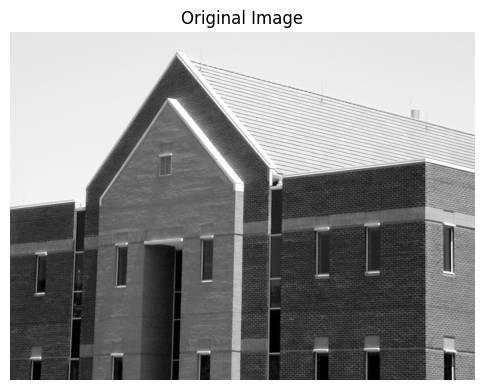

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
import pywt

# Step 1: Load and preprocess the image
# Read image in grayscale
image = cv2.imread('image.tif', cv2.IMREAD_GRAYSCALE)

print("Step 1: Image loaded successfully")
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

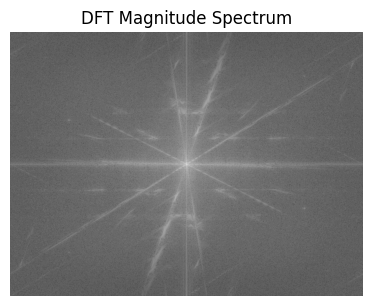


Step 2: DFT Analysis completed


In [5]:
# Step 2: DFT Analysis
# Apply DFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Visualize DFT spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT Magnitude Spectrum')
plt.axis('off')
plt.show()

print("\nStep 2: DFT Analysis completed")

# DFT Reconstruction
f_ishift = np.fft.ifftshift(dft_shift)
dft_reconstructed = cv2.idft(f_ishift)
dft_reconstructed = cv2.magnitude(dft_reconstructed[:,:,0], dft_reconstructed[:,:,1])


Step 3: Performing Wavelet Analysis...


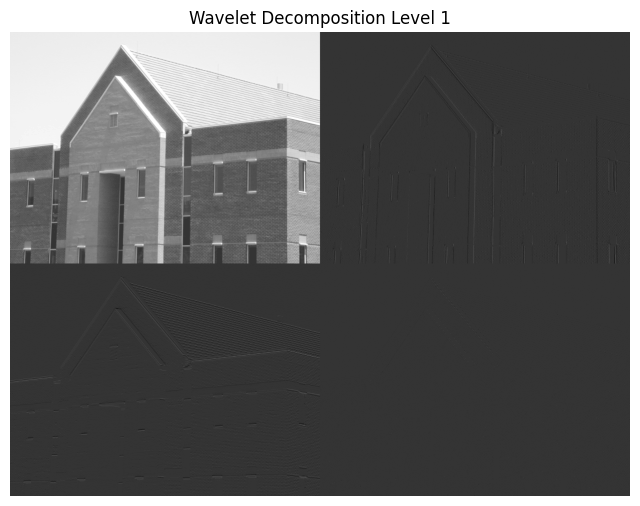

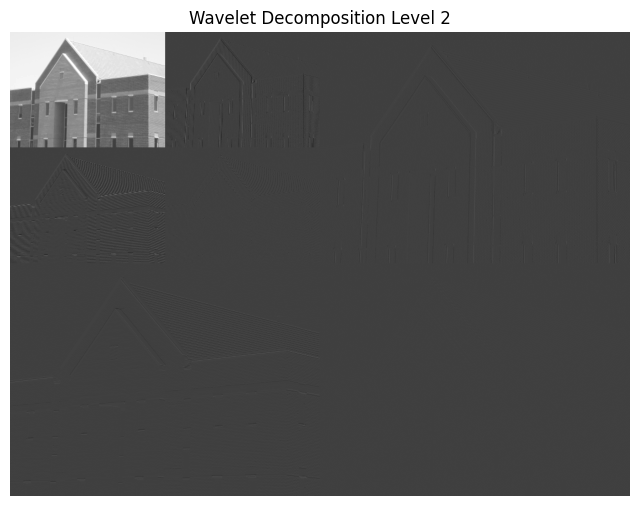

In [6]:
# Step 3: Wavelet Analysis
print("\nStep 3: Performing Wavelet Analysis...")

# Level 1 Wavelet Decomposition
wavelet_coeffs_l1 = pywt.wavedec2(image, 'db1', level=1)
# Convert coefficients to array for visualization
wavelet_array_l1, _ = pywt.coeffs_to_array(wavelet_coeffs_l1)

# Visualize Level 1 Decomposition
plt.figure(figsize=(8, 8))
plt.imshow(wavelet_array_l1, cmap='gray')
plt.title('Wavelet Decomposition Level 1')
plt.axis('off')
plt.show()

# Level 2 Wavelet Decomposition
wavelet_coeffs_l2 = pywt.wavedec2(image, 'db1', level=2)
# Convert coefficients to array for visualization
wavelet_array_l2, _ = pywt.coeffs_to_array(wavelet_coeffs_l2)

# Visualize Level 2 Decomposition
plt.figure(figsize=(8, 8))
plt.imshow(wavelet_array_l2, cmap='gray')
plt.title('Wavelet Decomposition Level 2')
plt.axis('off')
plt.show()

# Wavelet Reconstruction
wavelet_reconstructed = pywt.waverec2(wavelet_coeffs_l2, 'db1')


Step 4: Comparing Results...


C:\Users\satch\AppData\Local\Temp\ipykernel_19208\192112410.py:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  dft_psnr_value = psnr(image, dft_reconstructed)
C:\Users\satch\AppData\Local\Temp\ipykernel_19208\192112410.py:6: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  wavelet_psnr_value = psnr(image, wavelet_reconstructed)


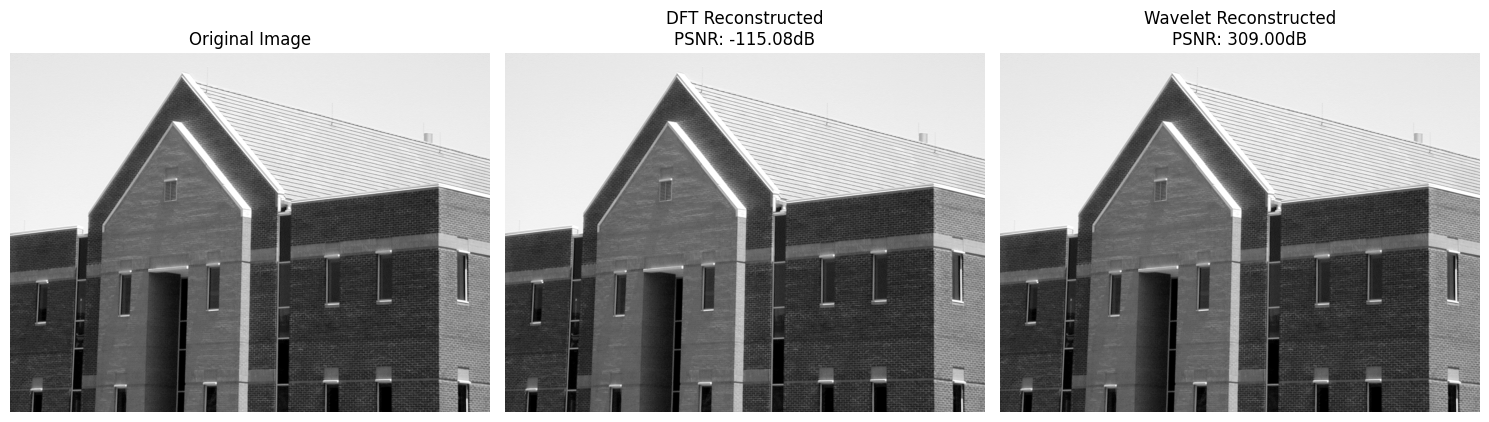


Final Results:
DFT Reconstruction PSNR: -115.08 dB
Wavelet Reconstruction PSNR: 309.00 dB

Analysis:
Wavelet reconstruction performed better in terms of PSNR


In [7]:
# Step 4: Comparison
print("\nStep 4: Comparing Results...")

# Calculate PSNR values
dft_psnr_value = psnr(image, dft_reconstructed)
wavelet_psnr_value = psnr(image, wavelet_reconstructed)

# Final Visualization comparing all images
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# DFT Reconstructed
plt.subplot(132)
plt.imshow(dft_reconstructed, cmap='gray')
plt.title(f'DFT Reconstructed\nPSNR: {dft_psnr_value:.2f}dB')
plt.axis('off')

# Wavelet Reconstructed
plt.subplot(133)
plt.imshow(wavelet_reconstructed, cmap='gray')
plt.title(f'Wavelet Reconstructed\nPSNR: {wavelet_psnr_value:.2f}dB')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print comparison results
print("\nFinal Results:")
print(f"DFT Reconstruction PSNR: {dft_psnr_value:.2f} dB")
print(f"Wavelet Reconstruction PSNR: {wavelet_psnr_value:.2f} dB")

# Analysis of results
print("\nAnalysis:")
if dft_psnr_value > wavelet_psnr_value:
    print("DFT reconstruction performed better in terms of PSNR")
else:
    print("Wavelet reconstruction performed better in terms of PSNR")

Image loaded and resized to: (512, 512)


ValueError: could not broadcast input array from shape (128,128) into shape (256,256)

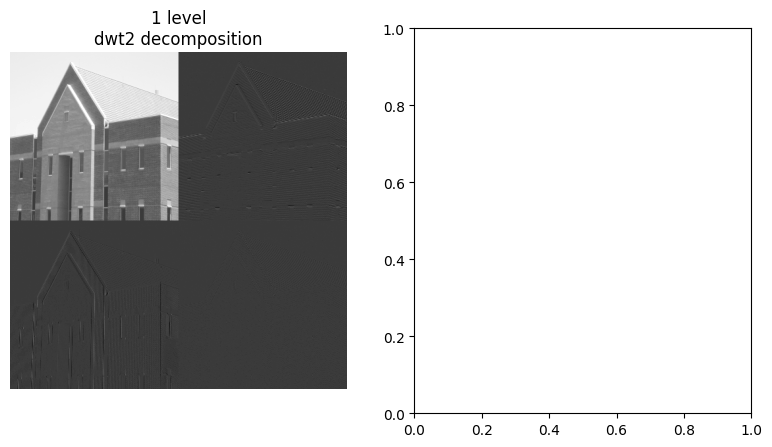

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os

# Check and load image
image_path = 'image.tif'  # Replace with your actual image path

# Check if file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image file not found at: {image_path}")

# Read the image
img = cv2.imread(image_path)
if img is None:
    raise ValueError(f"Failed to load image from: {image_path}")

# Convert to grayscale if image is color
if len(img.shape) == 3:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize to power of 2 to avoid dimension issues
target_size = 512  # or 256, depending on your needs
img = cv2.resize(img, (target_size, target_size))
img = np.float32(img)

print(f"Image loaded and resized to: {img.shape}")



# Compute coefficients for all levels at once
coeffs = pywt.wavedec2(img, 'db1', level=3)

# Arrange coefficients
coeffs_arr, slices = pywt.coeffs_to_array(coeffs)

# Create visualization for each level separately
plt.figure(figsize=(20, 5))

# Level 1
plt.subplot(141)
LL1, (LH1, HL1, HH1) = pywt.dwt2(img, 'db1')
N1 = LL1.shape[0]
vis1 = np.zeros((N1*2, N1*2))
vis1[:N1, :N1] = LL1
vis1[:N1, N1:] = LH1
vis1[N1:, :N1] = HL1
vis1[N1:, N1:] = HH1
plt.imshow(vis1, cmap='gray')
plt.title('1 level\ndwt2 decomposition')
plt.axis('off')

# Level 2
plt.subplot(142)
LL2, (LH2, HL2, HH2) = pywt.dwt2(LL1, 'db1')
N2 = LL2.shape[0]
vis2 = np.zeros((N1*2, N1*2))
# Level 2 coefficients
vis2[:N2, :N2] = LL2
vis2[:N2, N2:2*N2] = LH2
vis2[N2:2*N2, :N2] = HL2
vis2[N2:2*N2, N2:2*N2] = HH2
# Fill in level 1 details
vis2[:(N1*2)//2, (N1*2)//2:] = LH1[:N2, :N2]
vis2[(N1*2)//2:, :(N1*2)//2] = HL1[:N2, :N2]
vis2[(N1*2)//2:, (N1*2)//2:] = HH1[:N2, :N2]
plt.imshow(vis2, cmap='gray')
plt.title('2 level\ndwt2 decomposition')
plt.axis('off')

# Level 3
plt.subplot(143)
LL3, (LH3, HL3, HH3) = pywt.dwt2(LL2, 'db1')
N3 = LL3.shape[0]
vis3 = np.zeros((N1*2, N1*2))
# Level 3 coefficients
vis3[:N3, :N3] = LL3
vis3[:N3, N3:2*N3] = LH3
vis3[N3:2*N3, :N3] = HL3
vis3[N3:2*N3, N3:2*N3] = HH3
# Level 2 details
vis3[:2*N3, 2*N3:4*N3] = LH2[:N3, :N3]
vis3[2*N3:4*N3, :2*N3] = HL2[:N3, :N3]
vis3[2*N3:4*N3, 2*N3:4*N3] = HH2[:N3, :N3]
# Level 1 details - use proper slicing
vis3[:, 4*N3:] = LH1[:vis3.shape[0], :vis3.shape[1]-4*N3]
vis3[4*N3:, :] = HL1[:vis3.shape[0]-4*N3, :vis3.shape[1]]
vis3[4*N3:, 4*N3:] = HH1[:vis3.shape[0]-4*N3, :vis3.shape[1]-4*N3]
plt.imshow(vis3, cmap='gray')
plt.title('3 level\ndwt2 decomposition')
plt.axis('off')

# Original image
plt.subplot(144)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# For better visualization, normalize the coefficients
def normalize_coeffs(arr):
    arr = np.abs(arr)
    arr = (arr - arr.min()) / (arr.max() - arr.min())
    return arr

# Display coefficients separately
plt.figure(figsize=(20, 5))

# Original image
plt.subplot(141)
plt.imshow(normalize_coeffs(img), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Level 1 approximation
plt.subplot(142)
plt.imshow(normalize_coeffs(LL1), cmap='gray')
plt.title('Coefficients\n1 level')
plt.axis('off')

# Level 2 approximation
plt.subplot(143)
plt.imshow(normalize_coeffs(LL2), cmap='gray')
plt.title('Coefficients\n2 level')
plt.axis('off')

# Level 3 approximation
plt.subplot(144)
plt.imshow(normalize_coeffs(LL3), cmap='gray')
plt.title('Coefficients\n3 level')
plt.axis('off')

plt.tight_layout()
plt.show()